In [2]:
%matplotlib inline
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

w[0]: 0.393906  b: -0.031804


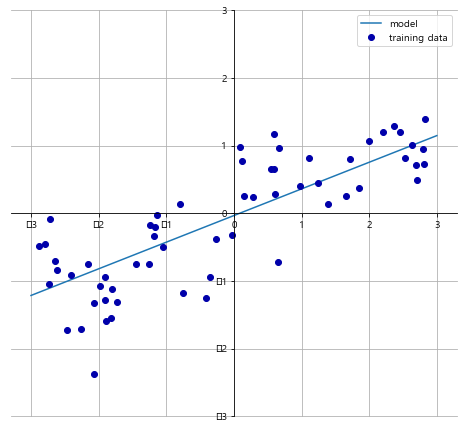

In [2]:
mglearn.plots.plot_linear_regression_wave()

## 선형 회귀(최소제곱법)

예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾음. 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더훈 후에 샘플의 개수로 나눈 것. 선형 회귀는 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법이 없음.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [7]:
print('lr.coef_:{}'.format(lr.coef_))
#기울기 파라미터(w) = 가중치 = 계수
print("lr.intercept_:{}".format(lr.intercept_))
#편향 = 절편 파라미터(b)

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [8]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수:0.67
테스트 세트 점수:0.66


훈련 세트와 테스트 세트의 점수가 매우 비슷함(과소적합인 상태를 의미함). 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합이될 가능성이 높음.

In [9]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [11]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수:0.95
테스트 세트 점수:0.61


훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야함.

## 릿지 회귀

가중치의 절댓값을 가능한 한 작게 만듦. w의 모든 원소가 0에 가깝게 되길 원함. 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게 만든다). 이런 제약을 규제라고 함. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미. 릿지 회귀에 사용하는 규제 방식을 L2규제 라고함.

In [13]:
from sklearn.linear_model import Ridge

In [14]:
ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.89
테스트 세트 점수:0.75


훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높음. 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐. 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반회된 모델이 됨.

alpha 매겨변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있음. alpha값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도음을 줄 수 있음.

In [17]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.79
테스트 세트 점수:0.64


아주 작은 alpha 값은 계수를 거의 제한하지 않으므로 LinearRegression으로 만든 모델과 거의 같아짐

In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수:0.93
테스트 세트 점수:0.77


규제의 효과를 이애하는 또 다른 방법은 alpha값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것. 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습 곡선 이라고 함.

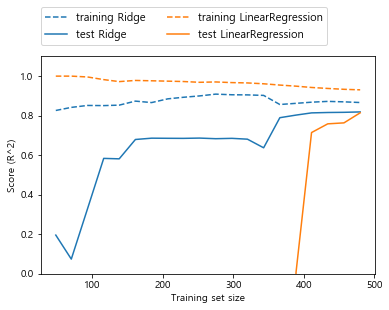

In [21]:
mglearn.plots.plot_ridge_n_samples()

릿지에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음. 그러나 테스트 데이터에서는 릿지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 그럼. 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡음. 여기서 배울 점은 데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지 회귀와 선형 회귀의 성능이 같아질 것이라는 점. 또 하나의 흥미로운 점은 선형 회귀의 훈련 데이터 성능은 점점 감소한다는 것. 이는 데이터가 많아질수록 모델이 데이터를 기억하거나 괴대적합하기 어려워지기 때문.

## 라쏘

L1규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 됨. 이 말은 모델에서 완전히 제외되는 특성이 생긴다는 뜻. 어떻게 보면 특성 선택이 자동으로 이루어진다고 볼 수 있음. 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내줌.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 수:4


Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않음. 이는 과소적합이며 105개의 특성 중 4개만 사용한 것을 볼 수 있음. 과소적합을 줄이기 위해서 alpah값을 줄여야함. 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 함.

In [27]:
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)

In [28]:
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 수:33


alpha값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아집니다. alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해짐.

In [30]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 수:{}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 수:94


특성이 많고 그중 일부분만 중요하다면 Lasso가 좋은 선택. 또한 분석하기 쉬운 모델을 원한다면 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어줄 것. Lasso와 Ridge의 패널티를 결합한 ElasticNet도 있음.

## 분류용 선형 모델

함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측.
선형 모델을 학습시키는 알고리즘은 다앙한데, 다음의 두가지 방법으로 구분할 수 있음.
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


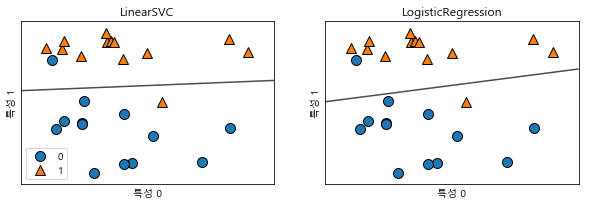

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

두 모델은 기본적으로 L2 규제를 사용함

LogisticRegression과 LinearSVC에서 규제와 강도를 결정하는 매개변수는 C임.
C의 값이 높아지면 규제 감소. 다시말해 매개변수로 높은 C값을 지정하면
LogisticRegression과 LinearSVC는 훈련 세트에 최대로 맞추려하고,
반면에 C값을 낮추면 모델은 계수 벡터가 0 에 가까워지도록 만듦

C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류하려고 할것.

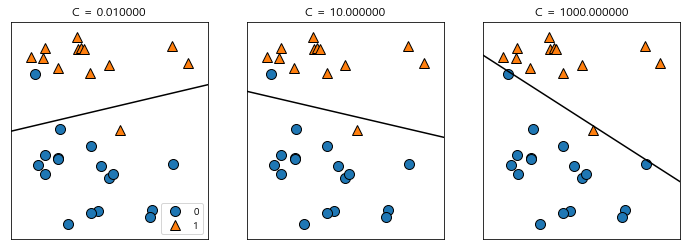

In [10]:
mglearn.plots.plot_linear_svc_regularization()

In [13]:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


훈련세트와 테스트 세트의 성능이 매우 비슷하므로 괴소적합인 것 같음.
제약을 풀어주기위해 C를 증가시킴.

In [15]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


C=100을 사용하니 훈련 세트의 정확도가 높아졌고 테스트 세트의 정확도도 조금 증가함.
이는 복잡도가 높은 모델일수록 성능이 좋음을 말해줌.

In [17]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


규제를 강하게 하기 위해 C=0.01 사용.
기본 매개변수일 때보다 낮아짐.

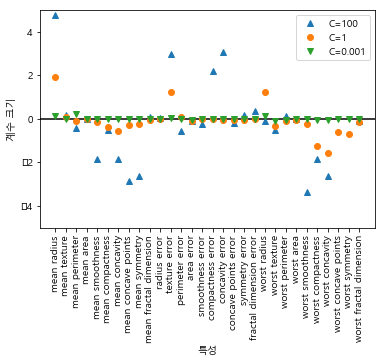

In [19]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

유방암 데이터셋에 각기 다른 C값을 사용하여 만든 로지스틱 회귀의 계수

# 다중 클래스 분류용 선형 모델

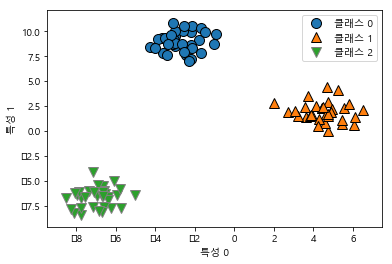

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [23]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


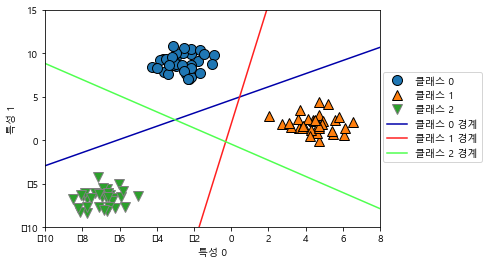

In [24]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

Text(0,0.5,'특성 1')

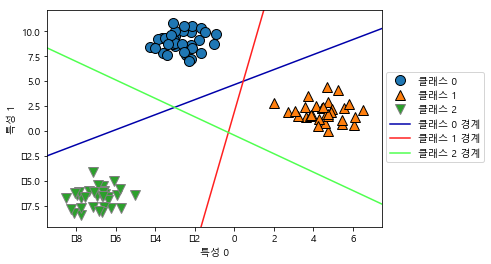

In [25]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 c임.
alpha값이 클수록, C 값이 작을수록 모델이 단순해짐. 특별히 회귀 모델에서 이 매겨번수를 조정하는 일이 매우 중요.
중요한 특성이 많지 않다고 생각하면 L1규제를 사용. 그렇지 않으면 기본적으로 L2 규제를 사용.
선형 모델은 샘플에 비해 특성이 많을 때 잘 작동함. 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음.